In [160]:
import networkx as nx
from pathlib import Path
import progressbar, csv, re
from pprint import pprint 

def get_mentions(text):
    g = re.findall(pattern='\s([@][\w_]+)', string=text)
    g = [s[1:] for s in g]
    return(g)

In [161]:
def process_tsv(file):
    G = nx.MultiDiGraph()
    if Path(file).is_file(): _ = [Path(file)]
    elif Path(file).is_dir(): _ = Path(file).glob(pattern="*.tsv")
    else:
        raise RuntimeError(f"Cannot interpret passed argument: {file}")
    for file in _:
        with Path(file).open("r") as f:
            _len = len(f.readlines())
        with Path(file).open("r") as f:
            bar = progressbar.ProgressBar(max_value=_len).start()
            reader = csv.DictReader(f, delimiter='\t')
            for i, rows in enumerate(reader):
                bar.update(i)
                G.add_node(rows['from_user'])
                if rows['in_reply_to_screen_name']: 
                    G.add_edge(rows['from_user'], rows['in_reply_to_screen_name'])
                    G[rows['from_user']][rows['in_reply_to_screen_name']]['type'] = "reply"
                mentions = get_mentions(rows['text'])
                if mentions:
                    for mention in mentions:
                        G.add_edge(rows['from_user'], mention)
                        G[rows['from_user']][mention]['type']='mention'
    bar.finish()
    return(G)

In [162]:
G = process_tsv('../../datasets/tags-tsv/boy-lesque/')

N/A% (0 of 87) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

TypeError: 'AtlasView' object does not support item assignment

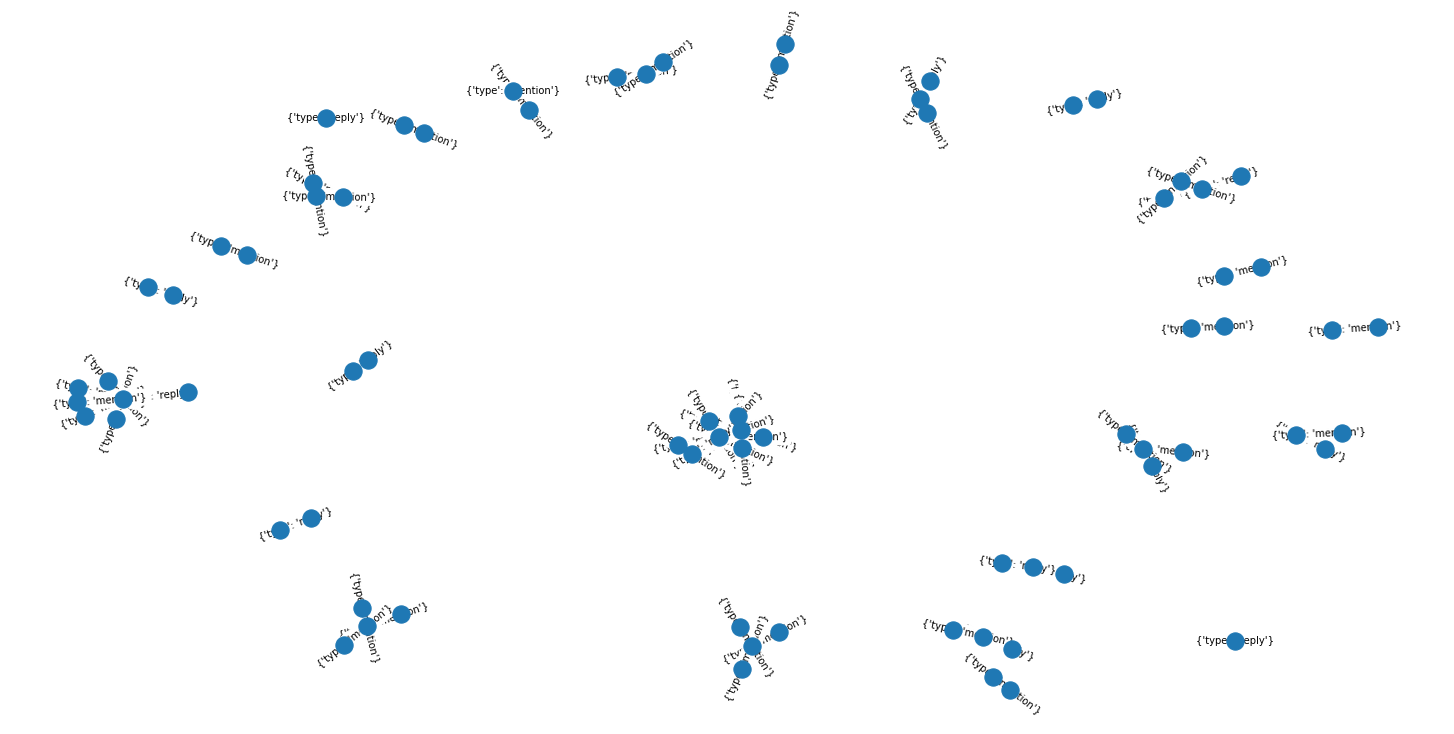

In [155]:
from matplotlib import pyplot as plt
%matplotlib inline

pos = nx.spring_layout(G)
plt.figure(figsize=(20,10))

nx.draw(G, pos)
node_labels = nx.get_node_attributes(G,'state')
nx.draw_networkx_labels(G, pos, labels = node_labels)
edge_labels = nx.get_edge_attributes(G,'state')
nx.draw_networkx_edge_labels(G, pos, labels = edge_labels)
plt.savefig('this.png')
plt.show()

In [158]:
G.edges()

EdgeView([('DonWeast', 'JBBauersfeld'), ('_ROCKNEVENTS', 'RocknRollBride'), ('MefukiUssia', 'MefukiUssia'), ('__d_aw__n___mm_', 'LiddyJayKB'), ('1chicklette', 'NegraYLibre'), ('1chicklette', 'more_moxie'), ('DeltaBadhand', 'RookyHomo'), ('DeltaBadhand', 'ohhwade'), ('ihearticream', 'madhatter1874'), ('ihearticream', 'ginnymoon80'), ('ihearticream', 'JEJjohns'), ('ihearticream', 'Kirsty_M_N'), ('ihearticream', 'AbbieRickards1'), ('ihearticream', 'ItsAlixMay'), ('FestCamden', 'Eyes_Bigger'), ('FestCamden', 'FestCamden'), ('cardiffbites', 'Winskillfull'), ('GarleniaDavis_', 'jonhabart'), ('GarleniaDavis_', 'RealVinnieJames'), ('GarleniaDavis_', 'WSJ'), ('_not_a_unicorn_', 'ThomasSanders'), ('JennieKinney', 'ClcktwrCabaret'), ('JennieKinney', 'Indy_Fire_'), ('ClcktwrCabaret', 'Indy_Fire_'), ('mcfreelv', 'SinBinVegas'), ('mcfreelv', 'Brgh4life'), ('BellwetherLV', 'PixVegas777'), ('BellwetherLV', 'thequeenofvegas'), ('kbeers0177', 'LogoTV'), ('LogoTV', 'JamesSemaj1220'), ('LogoTV', 'HouStOne

In [166]:
_id = G.add_node("hello2")
print(_id)

None
